In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
daily_data = pd.read_csv('/content/daily_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
hourly_data = pd.read_csv('/content/hourly_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
monthly_data = pd.read_csv('/content/monthly_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
three_hour_data = pd.read_csv('/content/three_hour_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])


<ipython-input-36-490780ca0794>:2: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_data = pd.read_csv('/content/hourly_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])


In [ ]:
common_columns = set(daily_data.columns) & set(hourly_data.columns) & set(monthly_data.columns) & set(three_hour_data.columns)

In [ ]:
merged_data = pd.merge(daily_data, hourly_data, on='DATE', how='outer', suffixes=('_daily', '_hourly'))
merged_data = pd.merge(merged_data, monthly_data, on='DATE', how='outer', suffixes=('_merged', '_monthly'))
merged_data = pd.merge(merged_data, three_hour_data, on='DATE', how='outer', suffixes=('_merged', '_three_hour'))

In [ ]:
monthly_precipitation = daily_data.groupby(daily_data['DATE'].dt.to_period("M"))['DailyPrecipitation'].sum()

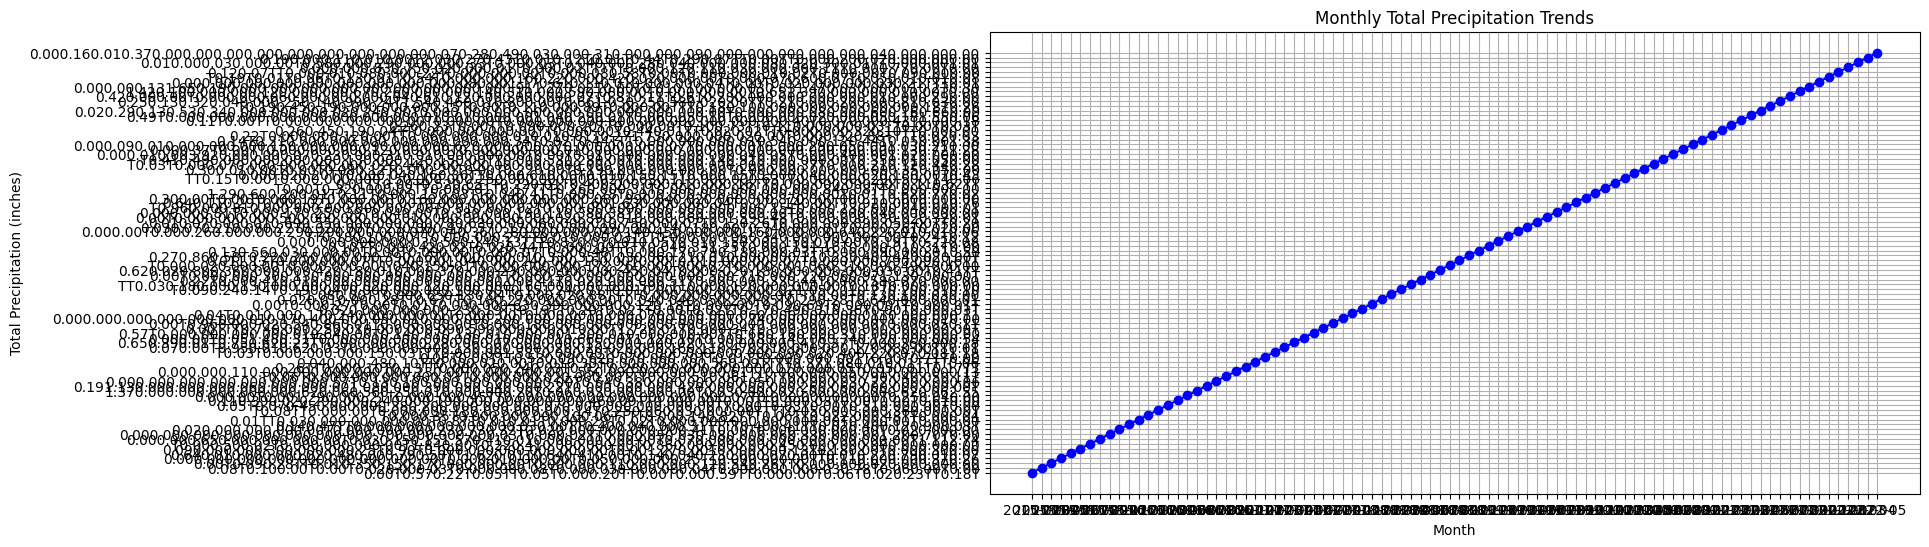

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_precipitation.index.astype(str), monthly_precipitation.values, marker='o', linestyle='-', color='blue')
plt.title('Monthly Total Precipitation Trends')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (inches)')
plt.grid(True)
plt.show()


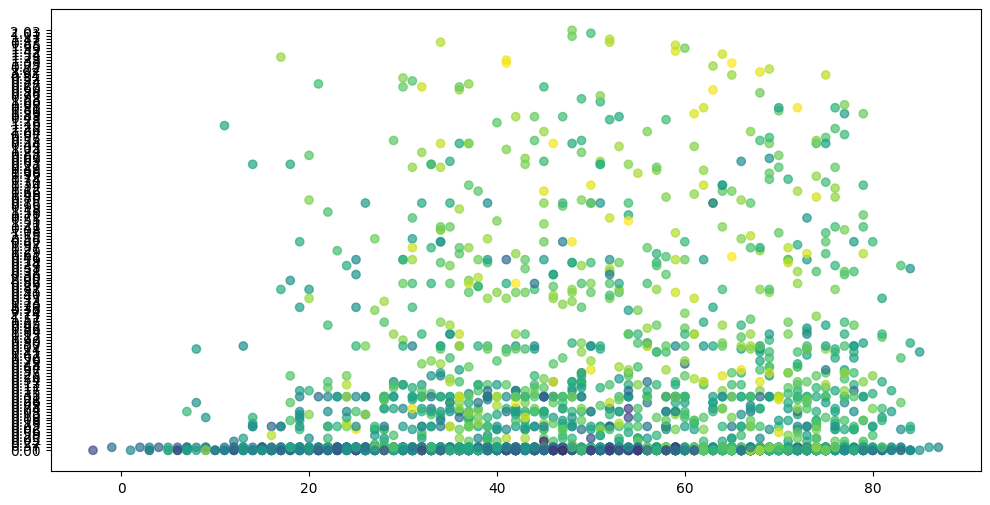

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(
    daily_data['DailyAverageDryBulbTemperature'],
    daily_data['DailyPrecipitation'],
    c=daily_data['DailyAverageRelativeHumidity'],  # Use humidity for color variation
    cmap='viridis',  # Choose a different colormap
    alpha=0.7
)

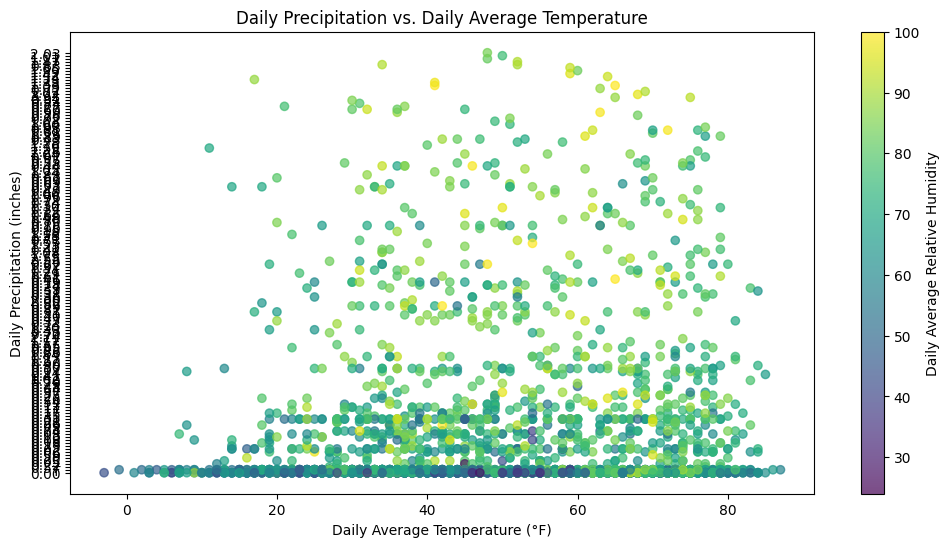

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(
    daily_data['DailyAverageDryBulbTemperature'],
    daily_data['DailyPrecipitation'],
    c=daily_data['DailyAverageRelativeHumidity'],
    cmap='viridis',
    alpha=0.7
)
plt.title('Daily Precipitation vs. Daily Average Temperature')
plt.xlabel('Daily Average Temperature (°F)')
plt.ylabel('Daily Precipitation (inches)')

# Create a colorbar using the scatter plot
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Daily Average Relative Humidity')

plt.show()

<ipython-input-45-e4df003a6c8b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SOURCE', y='DailyAverageDryBulbTemperature', data=daily_data, palette='Set3')


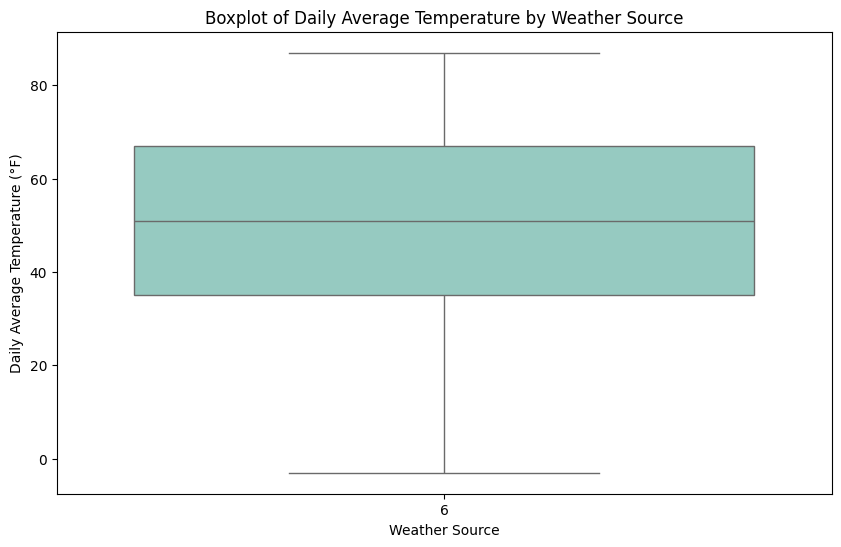

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SOURCE', y='DailyAverageDryBulbTemperature', data=daily_data, palette='Set3')
plt.title('Boxplot of Daily Average Temperature by Weather Source')
plt.xlabel('Weather Source')
plt.ylabel('Daily Average Temperature (°F)')
plt.show()

<ipython-input-46-52b297f62099>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DailyPeakWindDirection', data=merged_data, palette='pastel')


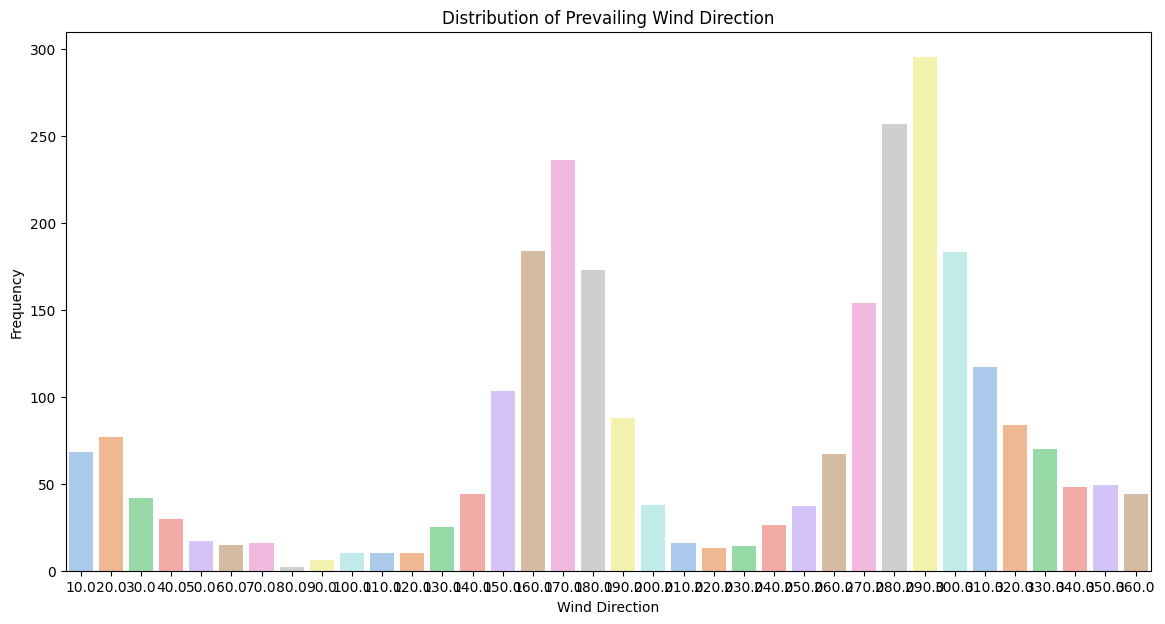

In [ ]:
# Bar plot of prevailing wind direction frequencies
plt.figure(figsize=(14, 7))
sns.countplot(x='DailyPeakWindDirection', data=merged_data, palette='pastel')
plt.title('Distribution of Prevailing Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.show()

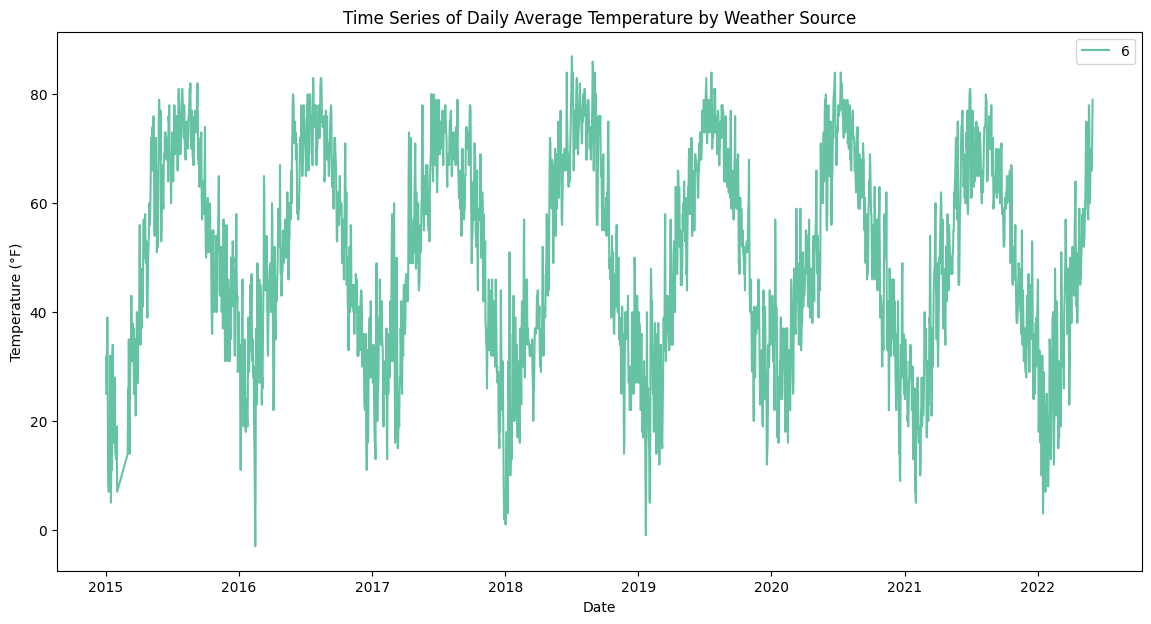

In [ ]:
plt.figure(figsize=(14, 7))
for source, color in zip(daily_data['SOURCE'].unique(), sns.color_palette('Set2', n_colors=len(daily_data['SOURCE'].unique()))):
    source_data = daily_data[daily_data['SOURCE'] == source]
    plt.plot(source_data['DATE'], source_data['DailyAverageDryBulbTemperature'], label=source, color=color)

plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Time Series of Daily Average Temperature by Weather Source')
plt.legend()
plt.show()